#Rede Neural Convolucional(CNN) - Aplicação a reconhecimento de imagens

A rede neural CNN ...

#Obtenção do conjunto de dados

O primeiro passo é a obtenção do conjunto de dados. Isso está feito com o Keras, importando o conjunto CIFAR10. \\
O conjunto CIFAR10 ....

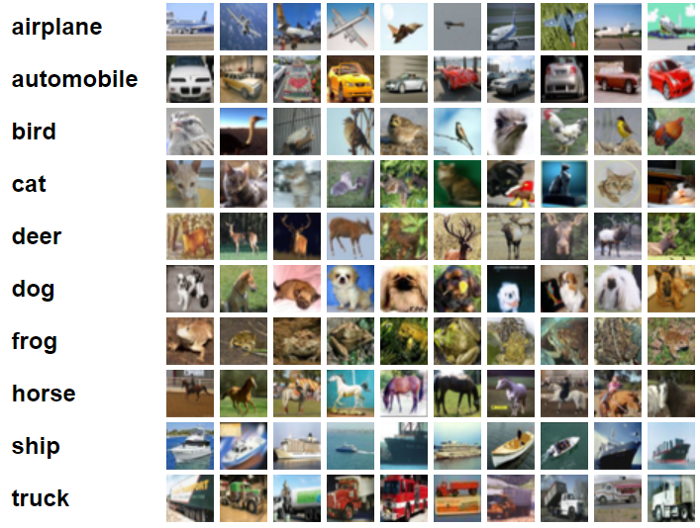


In [11]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Assim armazenamos o conjunto em (x_train, y_train, x_test and y_test). \\
Vamos então explorar um pouco este conjunto de dados:

In [12]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


Ou seja, temos 50000 imagens de entrada de tamanho 32x32x3.
E para cada imagem temos um valor correspondente à sua classe.

Para exemplificar vamos ver a primeira imagem:

In [13]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


##Visualização
Mas, visualizar a imagem é um pouquinho melhor e isso pode ser feito assim:


Esta imagem é da classe: [1]


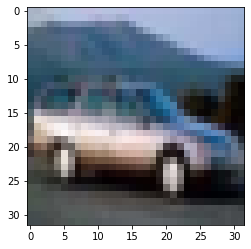

In [14]:
import matplotlib.pyplot as plt

img = plt.imshow(x_train[4])
print('Esta imagem é da classe:',y_train[4])


Esta imagem é da classe: [5]


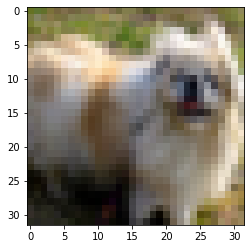

In [15]:
plt.imshow(x_train[40])
print('Esta imagem é da classe:',y_train[40])

##Classe dos dados - codificação dos valores de saída

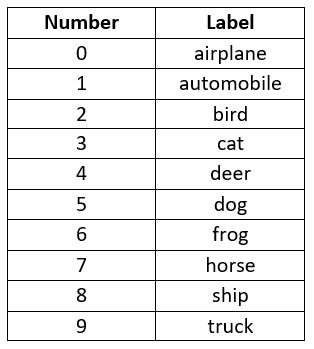

Temos um problema que tem como saída 10 classes distintas, ou seja, cada uma das imagens de entrada pode pertencer a uma das 10 classes. Nesta tabela, as classes tem nome e são representadas por números. Para a saída do modelo CNN, vamos transformar a saída em um vetor de 10 posições onde o valor 0 sifnifica que a imagem não pertence a classe indicada pela posição do vetor, e 1 indica que a classe pertence. Assim, conseguimos interpretar as probabilidades que a rede neural retorna como saída.

In [16]:
from tensorflow.keras.utils import to_categorical
##from keras.utils.np_utils import to_categorical
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

Veja que tem uma função do keras que faz isso. A classe do carro e do cachorro passam a ser representadas assim:

A imagem era da classe: [1] e passa a ser da classe: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


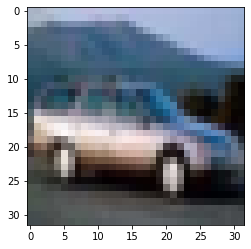

In [17]:
plt.imshow(x_train[4])
print('A imagem era da classe:',y_train[4], 'e passa a ser da classe:',y_train_one_hot[4])

A imagem era da classe: [5] e passa a ser da classe: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


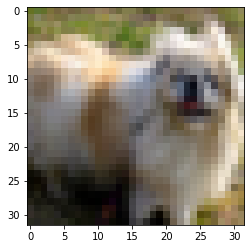

In [18]:
plt.imshow(x_train[40])
print('A imagem era da classe:',y_train[40], 'e passa a ser da classe:',y_train_one_hot[40])

##Normalização dos dados de entrada 

Os valores das imagens estão entre 0 e 255. A normalização vai colocar os valores entre 0 e 1 para que os dados fiquem adequados para entreda na rede neural.

Os dados são convertidos para decimal e então dividos por 255. 

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

#A arquitetura da CNN

Na literatura encontramos diferentes arquiteturas, cada qual adequada para cada aplicação. Aqui será apresentado um conjunto de camadas para solução do problema de classificação de imagens nas 10 classes definida no conjunto CIFAR10.

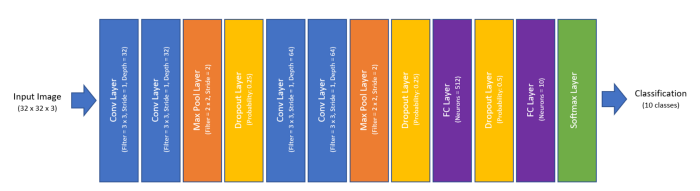

A última camada (softmax) tem a função de transformar a saída da camada anterior em distribuições de probabilidade, que é o tipo de saída que estamos esperando para o problema.

Toda as camadas de convolução empregam o mesmo preenchimento, fazendo com que a saída tenha o mesmo tamanho da entrada, ou seja, as bordas são preenchidas com 1. 

A função de ativação empregada em todas as camadas, exceto a última, é a ReLU.

O modelo empregado neste exemplo é o Keras sequencial, que será importado da biblioteca keras.



In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()

Em "model" temos um modelo vazio, onde serão adicionadas as camadas.

A primeira camada é uma camada de convolução com filtro 3x3, deslocamento 1 (nas duas dimensões) e profundidade 32. O preenchimento (padding) e a função de ativação (activation), empregam parâmetros correspondentes a preenchimento igual a 1 nas bordas e função ReLU, respectivamente. 

Assim, temos a primeira camada sendo adicionada pela função model.add(). O deslocamento (stride) não foi especificado, pois é o valor padrão.

In [21]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

É importante observar que na primeira camada precisamos definir o tamanho da entrada. Camadas subsequentes não requerem esta especificação, pois podem inferir o tamanho da entrada a partir da saída da camada anterior.

Assim, a segunda camada pode ser definida como se segue.

In [22]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

Em seguida é definida a camada de pooling (camada de agrupamento, ou camada de subamostragem), de tamanho 2 x 2 e deslocamento (stride) 2 (nas duas dimensões). Por padrão, o deslocamento é o tamanho do filtro da camada, e por isso não foi especificado.

In [23]:
model.add(MaxPooling2D(pool_size=(2, 2)))

E então, a quarta camada é adicionada, a camada de dropout com probabilidade 0,25. Camada usada apenas no treinamento para eliminar um conjunto aleatório de ativações, que são zeradas. Nesta caso, 25% dos neurônios são zerados.

In [24]:
model.add(Dropout(0.25))

As 4 camadas seguintes são geradas da seguinte forma:

In [25]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

Neste ponto, os neurônios estão espacialmente dispostos como um "cubo". Podemos formatá-los em uma linha através da camada "Flatten", seguida de uma camada densa de 512 neurônios com ativação relu. 



In [26]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))


Novamente, a camada de dropout é empregada eliminando um conjunto de ativações. Agora com probabilidade 0,5. E, por fim, uma camada de neurônios com 10 neurônios e ativação softmax gera a saída da rede.

In [27]:
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

A arquitetura da rede está definida e pode ser ser resumida assim:

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

##Compilando o modelo

A função de perda empregada é tradicionalmente empregada nos problemas de classificação multiclasse. O otimizador é o Adam, que é um tipo de gradiente descendente estocástico. E por fim, as métricas de acurácia do modelo são geradas.

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

##Treinando o modelo

O modelo é treinado com 20 épocas. Foi definido 20% do conjunto como conjunto de validação.




In [31]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 175s 140ms/step - loss: 1.5222 - accuracy: 0.4451 - val_loss: 1.1332 - val_accuracy: 0.5888
Epoch 2/10
1250/1250 [==============================] - 173s 138ms/step - loss: 1.1517 - accuracy: 0.5918 - val_loss: 1.0000 - val_accuracy: 0.6439
Epoch 3/10
1250/1250 [==============================] - 172s 138ms/step - loss: 1.0016 - accuracy: 0.6435 - val_loss: 0.8452 - val_accuracy: 0.6988
Epoch 4/10
1250/1250 [==============================] - 169s 135ms/step - loss: 0.9078 - accuracy: 0.6798 - val_loss: 0.8133 - val_accuracy: 0.7077
Epoch 5/10
1250/1250 [==============================] - 170s 136ms/step - loss: 0.8446 - accuracy: 0.7030 - val_loss: 0.7665 - val_accuracy: 0.7258
Epoch 6/10
1250/1250 [==============================] - 172s 137ms/step - loss: 0.7884 - accuracy: 0.7224 - val_loss: 0.7564 - val_accuracy: 0.7372
Epoch 7/10
1250/1250 [==============================] - 170s 136ms/step - loss: 0.7441 - accuracy: 0.7383 - val_

Após o treinamento, é possível visualizar os gráficos de erro e acurácia do modelo gerado.

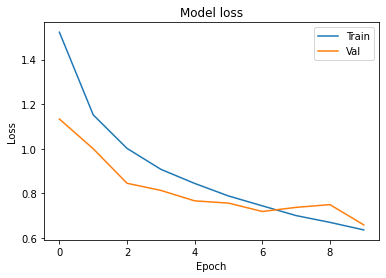

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Podemos também visualizar a acurácia:

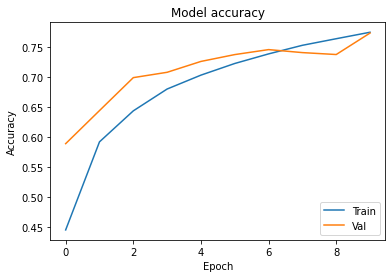

In [33]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Além do erro e da acurácia do modelo no conjunto de dados de teste.

In [34]:
model.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 10s 33ms/step - loss: 0.6940 - accuracy: 0.7606


[0.6939969658851624, 0.7605999708175659]

##Salvando o modelo treinado...

In [35]:
model.save('my_cifar10_model2.h5')

Para carregar o modelo quando necessário:

In [ ]:
from keras.models import load_model
model = load_model('my_cifar10_model.h5')

#Testando o classificador 

(310, 314, 3)

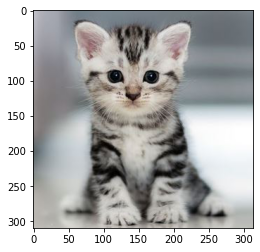

In [37]:
my_image = plt.imread("/content/cat.jpg")
plt.imshow(my_image)
my_image.shape



Para testar se uma nova imagem é classificada corretamenete, é necessário que ela seja uma imagem 32x32. E verifique também se os valores da imagem estão entre 0 e 1.

array([[[0.72647059, 0.72647059, 0.75784314],
        [0.67622549, 0.6814951 , 0.71286765],
        [0.64693627, 0.65870098, 0.6939951 ],
        ...,
        [0.44571078, 0.47316176, 0.49669118],
        [0.45747549, 0.48597963, 0.51151961],
        [0.46139706, 0.49669118, 0.52414216]],

       [[0.71213235, 0.71213235, 0.7435049 ],
        [0.66580882, 0.67056143, 0.70492877],
        [0.64313343, 0.65489813, 0.69019225],
        ...,
        [0.41960784, 0.44705882, 0.47058824],
        [0.43137255, 0.45882353, 0.48235294],
        [0.43529412, 0.46892233, 0.49411765]],

       [[0.69710095, 0.69710095, 0.7284735 ],
        [0.65404412, 0.65820695, 0.69105775],
        [0.63529412, 0.64705882, 0.68226486],
        ...,
        [0.41164216, 0.43909314, 0.46262255],
        [0.42046952, 0.45036382, 0.4745098 ],
        [0.42352941, 0.45490196, 0.48235294]],

       ...,

       [[0.72156863, 0.70980392, 0.69019608],
        [0.71764706, 0.70980392, 0.69019608],
        [0.70588235, 0

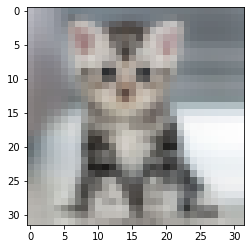

In [40]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

img = plt.imshow(my_image_resized)
my_image_resized


In [41]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [42]:
probabilities

array([[6.6188822e-04, 1.2681309e-05, 1.2440153e-02, 1.3010558e-01,
        7.5144812e-02, 6.5893853e-01, 1.0578528e-03, 1.2127061e-01,
        3.1185517e-04, 5.6092111e-05]], dtype=float32)

In [43]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.6589385
Second most likely class: cat -- Probability: 0.13010558
Third most likely class: horse -- Probability: 0.12127061
Fourth most likely class: deer -- Probability: 0.07514481
Fifth most likely class: bird -- Probability: 0.012440153


##Referência
https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce


https://www.tensorflow.org/tutorials/images/cnn